# Analisis de resultados del experimento 1 - Disponibilidad

In [27]:
import pandas as pd
df_results_exp1 = pd.read_csv('results.jtl')

In [28]:
df_results_exp1.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1744066862505,167,HTTP Request,200,OK,Prueba de disponibilidad de creacion de ordene...,text,True,NaN,322,140,1,1,http://localhost:8080/monitor/ms-order-service,164,0,7
1,1744066862874,159,HTTP Request,200,OK,Prueba de disponibilidad de creacion de ordene...,text,True,NaN,321,140,1,1,http://localhost:8080/monitor/ms-order-service,159,0,0
2,1744066863278,174,HTTP Request,200,OK,Prueba de disponibilidad de creacion de ordene...,text,True,NaN,322,140,1,1,http://localhost:8080/monitor/ms-order-service,174,0,0
3,1744066863677,10,HTTP Request,200,OK,Prueba de disponibilidad de creacion de ordene...,text,True,NaN,380,140,1,1,http://localhost:8080/monitor/ms-order-service,10,0,0
4,1744066864077,171,HTTP Request,200,OK,Prueba de disponibilidad de creacion de ordene...,text,True,NaN,322,140,1,1,http://localhost:8080/monitor/ms-order-service,171,0,0


In [29]:
# Read a folder full of json files and put it into a dataframe
import os
import json
import pandas as pd
def read_json_files_in_folder(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            with open(os.path.join(folder_path, filename), 'r') as f:
                data.append(json.load(f))
    return pd.DataFrame(data)
df_results_exp1 = read_json_files_in_folder('./responses/')
df_results_exp1.head()


,service,status,message,metrics
0,ms-order-service,healthy,Flujo completo exitoso,"{'total_time_ms': 188.94314765930176, 'created..."
1,ms-order-service,healthy,Flujo completo exitoso,"{'total_time_ms': 173.86484146118164, 'created..."
2,ms-order-service,healthy,Flujo completo exitoso,"{'total_time_ms': 186.6438388824463, 'created_..."
3,ms-order-service,healthy,Flujo completo exitoso,"{'total_time_ms': 174.5758056640625, 'created_..."
4,ms-order-service,healthy,Flujo completo exitoso,"{'total_time_ms': 170.5307960510254, 'created_..."


In [30]:
# Expand metrics from nested json
def expand_metrics(df):
    metrics = df['metrics'].apply(pd.Series)
    metrics.columns = [f'metric_{col}' for col in metrics.columns]
    return pd.concat([df.drop(columns=['metrics']), metrics], axis=1)
df_results_exp1 = expand_metrics(df_results_exp1)
df_results_exp1.head()

,service,status,message,metric_total_time_ms,metric_created_order_id,metric_timestamp,metric_alert_id
0,ms-order-service,healthy,Flujo completo exitoso,188.943148,1641.0,2025-04-07T18:01:09.469664,NaN
1,ms-order-service,healthy,Flujo completo exitoso,173.864841,1680.0,2025-04-07T18:01:25.853790,NaN
2,ms-order-service,healthy,Flujo completo exitoso,186.643839,1696.0,2025-04-07T18:01:32.266657,NaN
3,ms-order-service,healthy,Flujo completo exitoso,174.575806,1722.0,2025-04-07T18:01:42.654179,NaN
4,ms-order-service,healthy,Flujo completo exitoso,170.530796,1644.0,2025-04-07T18:01:11.050619,NaN


In [32]:
df_results_exp1.head()

,service,status,message,metric_total_time_ms,metric_created_order_id,metric_timestamp,metric_alert_id
0,ms-order-service,healthy,Flujo completo exitoso,188.943148,1641.0,2025-04-07T18:01:09.469664,NaN
1,ms-order-service,healthy,Flujo completo exitoso,173.864841,1680.0,2025-04-07T18:01:25.853790,NaN
2,ms-order-service,healthy,Flujo completo exitoso,186.643839,1696.0,2025-04-07T18:01:32.266657,NaN
3,ms-order-service,healthy,Flujo completo exitoso,174.575806,1722.0,2025-04-07T18:01:42.654179,NaN
4,ms-order-service,healthy,Flujo completo exitoso,170.530796,1644.0,2025-04-07T18:01:11.050619,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_mean_response_time(df, response_time_column, timestamp_column=None, figsize=(10, 6)):
    """
    Create a visualization of mean response times comparing alert vs non-alert data
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing response time and label data
    response_time_column : str
        Column name containing the response time in milliseconds
    timestamp_column : str, optional
        Column name for timestamps if you want to include a time series view
    figsize : tuple, optional
        Figure size (width, height) in inches
    """
    # Create figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # 1. Bar chart comparing mean response times
    mean_times = df.groupby('status')[response_time_column].mean().reset_index()
    mean_times['Status'] = mean_times['status'].map({0: 'healthy', 1: 'degraded'})
    
    sns.barplot(x='Status', y=response_time_column, data=mean_times, ax=axes[0])
    axes[0].set_title('Mean Response Time by Status')
    axes[0].set_ylabel('Response Time (ms)')
    
    # 2. Box plot to show distribution
    sns.boxplot(x='label', y=response_time_column, data=df, ax=axes[1])
    axes[1].set_title('Response Time Distribution')
    axes[1].set_xlabel('Status (0=Normal, 1=Alert)')
    axes[1].set_ylabel('Response Time (ms)')
    
    plt.tight_layout()
    plt.show()
    
    # Print some statistics for reference
    print("Mean Response Time Statistics:")
    for label, group_df in df.groupby('status'):
        status = "Alert" if label == 1 else "Normal"
        print(f"{status}: {group_df[response_time_column].mean():.2f} ms")
        
    # Calculate how much higher/lower the alert responses are
    if len(mean_times) == 2:
        normal = mean_times.loc[mean_times['status'] == 0, response_time_column].values[0]
        alert = mean_times.loc[mean_times['status'] == 1, response_time_column].values[0]
        pct_diff = ((alert - normal) / normal) * 100
        print(f"\nAlert response times are {abs(pct_diff):.2f}% {'higher' if pct_diff > 0 else 'lower'} than normal")

def plot_response_time_series(df, response_time_column, timestamp_column, figsize=(12, 6)):
    """
    Plot response times as a time series with alerts highlighted
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing response time, timestamp and label data
    response_time_column : str
        Column name containing the response time in milliseconds
    timestamp_column : str
        Column name for timestamps
    figsize : tuple, optional
        Figure size (width, height) in inches
    """
    # Ensure timestamp is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df[timestamp_column]):
        df[timestamp_column] = pd.to_datetime(df[timestamp_column])
    
    # Create figure
    plt.figure(figsize=figsize)
    
    # Plot all response times
    plt.scatter(df[timestamp_column], df[response_time_column], 
                c=df['label'].map({0: 'blue', 1: 'red'}),
                alpha=0.5, label='Response Time')
    
    # Add a line for the mean
    plt.axhline(y=df[response_time_column].mean(), color='green', linestyle='--', 
                label=f'Overall Mean: {df[response_time_column].mean():.2f} ms')
    
    # Add a line for alert mean
    if 1 in df['label'].values:
        alert_mean = df[df['label'] == 1][response_time_column].mean()
        plt.axhline(y=alert_mean, color='red', linestyle='--', 
                    label=f'Alert Mean: {alert_mean:.2f} ms')
    
    plt.title('Response Time Over Time with Alerts Highlighted')
    plt.xlabel('Timestamp')
    plt.ylabel('Response Time (ms)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_response_time_series(df, 'response_time_ms', 'timestamp') Example usage:
# plot_mean_response_time(df, 'response_time_ms')

In [41]:
df_results_exp1['status'].unique()

array(['healthy', 'degraded'], dtype=object)

KeyError: 'label'

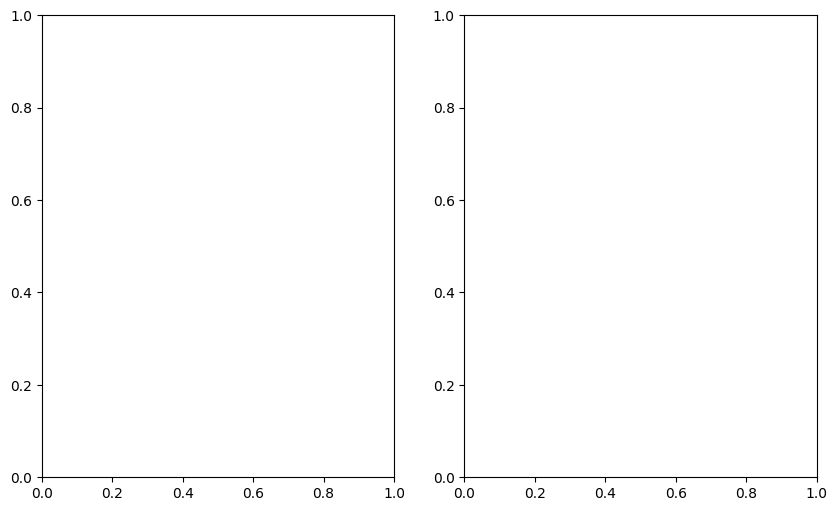

In [40]:
# Replace 'response_time_ms' with your actual column name that contains response times
response_time_column = 'metric_total_time_ms' 

# Plot the mean response time comparison
plot_mean_response_time(df_results_exp1, response_time_column)

# If you want to also see the time series view
# plot_response_time_series(df, response_time_column, 'timestamp')